**Importeren van benodigde libraries & het imporeren van de eerste dataset**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

dataframeGB = pd.read_csv("../initialdata/GBvideos.csv")

In [108]:
dataframeGB.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

<br><br>
# Tags in de beschrijving
YouTube maakt gebruik van tags. Volgens Google help, gemaakt door hetzelfde moederbedrijf als YouTube, hebben tags de volgende functie:

_"Tags are descriptive keywords you can add to your video to help people find your content."_
<br><br>
Een tag zorgt er dus voor dat een video makkelijker te vinden is. 
<br>
Hierdoor kan de hypothese worden gesteld dat er een verband is tussen het vinden van een video (het aantal views) en de tags in de beschrijving.<br> Deze hypothese zal in dit onderdeel worden onderzocht.<br><br>
Het onderzoeken van de tags zal gebeuren aan de hand van deelvragen:
* Hoeveel tags worden er gebruikt per video?
* Welke tags worden het meest gebruikt voor trending videos?
* is er een verband tussen het aantal tags per video en het aantal views van deze video?



Om te beginnen is er wat data preparation nodig. Het is namelijk zo dat de tags in de dataset allemaal achter elkaar staan, en opgeslagen zijn als object, en dit object eruit ziet als een hele lange lijst met tekst gescheiden door het "**|**" teken. Dit is hieronder te zien.

In [17]:
print("Het datatype van tags is: {0}. \nEen {0} in dit dataframe ziet er als volgt uit:\n\n{1}".format(dataframeGB.tags.dtype, dataframeGB["tags"][0]))

Het datatype van tags is: object. 
Een object in dit dataframe ziet er als volgt uit:

christmas|"john lewis christmas"|"john lewis"|"christmas ad"|"mozthemonster"|"christmas 2017"|"christmas ad 2017"|"john lewis christmas advert"|"moz"


Het werken met deze data is lastig, om deze reden zal er wat data preparatie moeten worden gedaan. Deze preparatie wordt uitgevoerd met de volgende stappen:
- De tags datatypes omzetten van objecten naar string
- De string tags scheiden op basis van het "**|**" teken
- Het verwijderen van de aanhalingstekens die sommige tags bevatten
- Het zetten van [None] tags naar lege cellen zodat ze tellen als 0
- Het verwijderen van videos die al in trending zijn geweest

_Het is belangrijk om te bedenken dat sommige videos meerdere keren kunnen voorkomen in dit dataframe. Dit gebeurt wanneer een video meerdere keren in trending is gekomen. Er is bij het analyseren van de tags gekozen om deze dubbele resultaten uit de dataframe te verwijderen, aangezien de tags bij deze videos hetzelfde blijven, en er is gekozen om deze dataset vanuit het oogpunt van iemand die in trending wil komen is bekeken, en hierbij niet de pre willen meenemen dat deze persoon al eerder dezelfde video in trending heeft gehad._<br><br>

Hieronder wordt er een nieuw dataframe gemaakt met title en tags. De videos die al in de dataset staan worden worden verwijdrd, zodat een video maar een keer voorkomt.

In [36]:
#dataframeGB = dataframeGB.drop_duplicates(subset = 'video_id', keep= 'first') #drops records with duplicates in the video_id column
flerp = dataframeGB.drop_duplicates(subset = 'video_id', keep= 'first') #drops records with duplicates in the video_id column

dataframeGB["tags"] = dataframeGB["tags"].replace("[none]", "")
df = pd.DataFrame({"title" : dataframeGB["title"], "tags" : dataframeGB["tags"].str.split("|")}) 
df.count()

title    38916
tags     38916
dtype: int64

<br>**Hoeveelheid tags**<br><br>In dit onderdeel gaat er worden uitgezocht hoeveel tags er worden gebruikt voor trending videos. Dit gaat gebeuren door te kijken naar:
* Het gemiddelde aantal tags per video
* De maximum hoeveelheid tags per video
* De normaalverdeling van de hoeveelheid tags per video<br><br>
Hieronder is het gemiddeld aantal tags per video te zien en de maximale hoeveelheid tags.

In [19]:
tagCount = [len(x) for x in df.tags] #list comprehension to create a list with tags per video
dataFrameTagCount = pd.DataFrame({"title" : dataframeGB["title"],"views" : dataframeGB["views"] ,"tags" : dataframeGB["tags"].str.split("|"), "tagCount" : tagCount})

mostTags = dataFrameTagCount.sort_values(by=["tagCount", "title"], ascending = False) #video with most tags
print("Uit de onderstaande dataframe is te halen dat een video in trending gemiddeld afgerond {0} tags heeft.\n De video {1} heeft de meeste tags, namelijk {2}".format(round(dataFrameTagCount.tagCount.mean()), mostTags.title.head(1).to_string(index = False), mostTags.tagCount.head(1).to_string(index=False)))
dataFrameTagCount

Uit de onderstaande dataframe is te halen dat een video in trending gemiddeld afgerond 18 tags heeft.
 De video  부부싸움중인 강아지들 (사람이랑 완전 똑같음ㅋㅋㅋ) heeft de meeste tags, namelijk  78


,title,views,tags,tagCount
0,John Lewis Christmas Ad 2017 - #MozTheMonster,7224515,"[christmas, ""john lewis christmas"", ""john lewi...",9
1,Taylor Swift: …Ready for It? (Live) - SNL,1053632,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ...",36
2,Eminem - Walk On Water (Audio) ft. Beyoncé,17158579,"[Eminem, ""Walk"", ""On"", ""Water"", ""Aftermath/Sha...",6
3,Goals from Salford City vs Class of 92 and Fri...,27833,"[Salford City FC, ""Salford City"", ""Salford"", ""...",9
4,Dashcam captures truck's near miss with child ...,9815,[],1
...,...,...,...,...
38911,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,25066952,"[Enrique Iglesias feat. Pitbull, ""MOVE TO MIAM...",4
38912,Jacob Sartorius - Up With It (Official Music V...,1492219,"[jacob sartorius, ""jacob"", ""up with it"", ""jaco...",41
38913,Anne-Marie - 2002 [Official Video],29641412,"[anne, ""marie"", ""anne-marie"", ""2002"", ""two tho...",17
38914,Eleni Foureira - Fuego - Cyprus - LIVE - First...,14317515,"[Eurovision Song Contest, ""2018"", ""Lisbon"", ""C...",8


## visualisatie


In dit onderdeel zal de data van tags gevisualiseerd worden. Dit gaat gebeuren met de hand van de twee onderstaande grafieken.<br><br><br>
**Grafiek 1**
<br>grafiek 1 is de verdeling van de hoeveelheid tags die gebruikt wordt per trending video.<br>Zoals te zien is er *geen* perfecte normaalverdeling in deze grafiek.<br>Wel is er te zien dat, ondanks een gemiddelde van 19 tags per video, de meest gebruikte hoeveelheid tags rond de 10 ligt. 

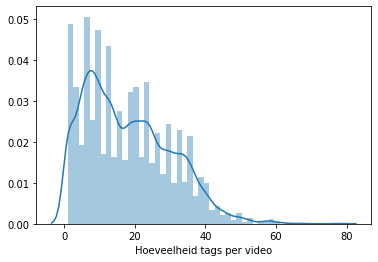

In [20]:
sn.distplot(tagCount, axlabel="Hoeveelheid tags per video")


**Grafiek 2**<br>In deze grafiek zijn de 20 meest gebruikte tags per video te zien.<br>Hierbij is te concluderen dat "Funny" het vaakst voorkomt als tag in trending.<br>Er is overigens gekozen om de videos waar *geen* tags worden gebruikt te labelen als 'No  tags used" 


De tag "funny" wordt het meest gebruikt bij trending videos. Wanneer je deze getallen omzet naar percentages, is er te concluderen dat "funny" wordt gebruikt in 2629 / 700439 videos.


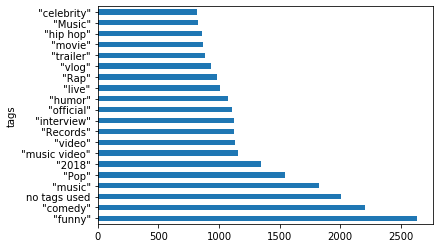

In [21]:
tagsDataframe = df.explode("tags") #per tag wordt er een nieuwe record aangemaakt met de video ID erbij 
tagsDataframe
tagsDataframe["tags"] = tagsDataframe["tags"].replace("", "no tags used")
mostUsedDataframe = tagsDataframe.groupby("tags").size().sort_values(ascending = False).head(20) #Top 20 most used tags
mostUsedDataframe.plot.barh()
print("\nDe tag {2} wordt het meest gebruikt bij trending videos. Wanneer je deze getallen omzet naar percentages, is er te concluderen dat {2} wordt gebruikt in {1} / {0} videos.".format(sum(dataFrameTagCount["tagCount"]), mostUsedDataframe[0], mostUsedDataframe.keys()[0]))


## vergelijking meeste views
Nu de meest gebruikte tags, het gemiddelde aantal tags per video en de meeste aantal tags per video bekend zijn, is er nog een belangrijke vraag over, namelijk: is er een verband tussen het aantal tags en de views op een video. Dit gaat hieronder worden onderzocht.<br><br> De eerste stap die hierin gemaakt is, is het uitzoeken welke videos de meeste kijkers hebben.

In [22]:
viewPerTagDataframe= dataFrameTagCount.copy()
mostViewedDataframe = viewPerTagDataframe.sort_values("views", ascending = False).head(20)

mutualTags = [x for x in mostViewedDataframe if x in mostUsedDataframe]
print(mutualTags)

#no results => most used tags don't correspond with most succesful video in trending

[]


In [23]:
print("De top 20 meest bekeken videos hebben gemiddeld {} tags per video".format(mostViewedDataframe["tagCount"].mean()))
mostViewedDataframe

De top 20 meest bekeken videos hebben gemiddeld 24.0 tags per video


,title,views,tags,tagCount
28412,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,424538912,"[Bad Bunny, ""Amorfoda"", ""Dura"", ""Daddy Yankee""...",33
28212,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,413586699,"[Bad Bunny, ""Amorfoda"", ""Dura"", ""Daddy Yankee""...",33
28008,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,402650804,"[Bad Bunny, ""Amorfoda"", ""Dura"", ""Daddy Yankee""...",33
27811,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,392036878,"[Bad Bunny, ""Amorfoda"", ""Dura"", ""Daddy Yankee""...",33
27615,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,382401497,"[Bad Bunny, ""Amorfoda"", ""Dura"", ""Daddy Yankee""...",33
27424,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,372399338,"[Bad Bunny, ""Amorfoda"", ""Dura"", ""Daddy Yankee""...",33
27241,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,362111555,"[Bad Bunny, ""Amorfoda"", ""Dura"", ""Daddy Yankee""...",33
27052,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,349987176,"[Bad Bunny, ""Amorfoda"", ""Dura"", ""Daddy Yankee""...",33
26861,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,339629489,"[Bad Bunny, ""Amorfoda"", ""Dura"", ""Daddy Yankee""...",33
34460,"Te Bote Remix - Casper, Nio García, Darell, Ni...",337621571,"[Te Bote, ""Te Bote Remix"", ""Flow La Movie"", ""O...",9


## Discussie
- Met de dataset is het niet mogelijk geweest om te bekijken hoe belangrijk tags zijn om in tending te komen, aangezien er geen data is voor non-trending videos.
- In dit onderzoek zijn videos die meerdere malen voorkwamen in de trending database weggelaten.
- Er is bij het kijken naar de meest gebruikte tags niet gekeken naar de categorie waar de tags zijn gebruikt. Het kan dus zijn dat bepaalde tags vaker voorkomen bij een bepaalde categorie videos.

## Conclusie
Als korte samenvatting zijn er in deze conclusie een paar van de bevindingen onder elkaar gezet. <br>Er is gekozen om dit als een print te doen, omdat de variabelen hierdoor niet hard-coded in dit jupyter notebook hoeven te staan. Voer daarom de onderstaande code uit voor een conclusie!


In [24]:
print("""
* Met de huidige dataset is het niet mogelijk om te bepalen hoe essentieel tags zijn om een video in de youtube-trending lijst te krijgen,\n aangezien de gebruikte dataset alleen videos heeft opgenomen die wel in de trending pagina terecht zijn gekomen
\n* De top 3 tags die gebruikt zijn onder trending videos zijn: {0}, {1} en {2}
\n* Een trending video gebruikt gemiddeld {3} tags, de video met de meeste tags had {4} tags
\n* Wanneer er gekeken werd naar de top 20 meest bekeken videos in trending, was het opmerkelijk dat geen van deze videos een van de meest gebruikte tags bevatte
\n* Naast dit feit, viel het ook op dat het gemiddeld aantal tags voor de videos in de top 20 meest bekeken videos in trending lager ligt dan het gemiddelde van alle trending videos, namelijk {5} in vergelijking met {3}.
""".format(mostUsedDataframe.keys()[0],mostUsedDataframe.keys()[1],mostUsedDataframe.keys()[2],round(dataFrameTagCount.tagCount.mean()),mostTags.tagCount.head(1).to_string(index=False) , round(mostViewedDataframe["tagCount"].mean())))


* Met de huidige dataset is het niet mogelijk om te bepalen hoe essentieel tags zijn om een video in de youtube-trending lijst te krijgen,
 aangezien de gebruikte dataset alleen videos heeft opgenomen die wel in de trending pagina terecht zijn gekomen

* De top 3 tags die gebruikt zijn onder trending videos zijn: "funny", "comedy" en no tags used

* Een trending video gebruikt gemiddeld 18 tags, de video met de meeste tags had  78 tags

* Wanneer er gekeken werd naar de top 20 meest bekeken videos in trending, was het opmerkelijk dat geen van deze videos een van de meest gebruikte tags bevatte

* Naast dit feit, viel het ook op dat het gemiddeld aantal tags voor de videos in de top 20 meest bekeken videos in trending lager ligt dan het gemiddelde van alle trending videos, namelijk 24 in vergelijking met 18.



# Trending data
In dit onderdeel zal de upload datum en de trending datum vergeleken worden.<br>
Dit onderzoek zal gedaan worden doormiddel van de volgende vragen:
- Hoeveel verschil zit er tussen de datum waarop de video voor het eerst trending was en upload datum van videos?
- Wat is het verschil tussen videos die wel meerdere keren trending werden, en die niet meerdere keren trending werden?
- Is het mogelijk om te voorspellen of een trending video opnieuw trending zal worden?

Als eerst wordt er gekeken naar de twee meest belangrijke kolommen voor het beantwoorden van deze vragen, namelijk de kolommen **trending date** en **publish date**.

In [7]:
print("trending date: " + dataframeGB.trending_date[0], "\npublish date: " + dataframeGB.publish_time[0])


trending date: 17.14.11 
publish date: 2017-11-10T07:38:29.000Z


Hieruit blijkt dat deze kolommen beiden in een compleet ander formaat staan. Dit is niet alleen het geval omdat de publish date veel meer informatie heeft, maar ook omdat trending date in het formaat **%y%d%m** staat, en publish date in het formaat **%y%m%d**. Om ze makkelijker te kunnen vergelijken, is er daarom besloten om ze in hetzelfde formaat te zetten.

In [6]:
import datetime
dataframeGBformattedTime = dataframeGB.copy()

trendingDate = pd.to_datetime(dataframeGBformattedTime['trending_date'], format = '%y.%d.%m')
publish_time = pd.to_datetime(dataframeGBformattedTime['publish_time'])

dataframeGBformattedTime['publish_time'] = publish_time.apply(lambda x:x.date())
dataframeGBformattedTime['trending_date'] = trendingDate.apply(lambda x:x.date())

dataframeGBformattedTime = dataframeGBformattedTime.astype({'trending_date': 'datetime64', 'publish_time' : 'datetime64'})
dataframeGBformattedTime

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


In [5]:
(dataframeGBformattedTime["trending_date"]- dataframeGBformattedTime['publish_time'])

NameError: name 'dataframeGBformattedTime' is not defined

<br>**Verschil trending en publish datum**<br>Om een inzicht te krijgen in het verschil tussen de publish en de trending tijd, is hieronder een kort overzichtje gemaakt met wat interessante cijfers.

In [46]:
print("""
Het duurde gemiddeld {0} dagen voor een video in dit dataframe om trending te raken.
Verder heeft de video die het langst erover deed om trending te worden er {1} dagen over.
De meeste videos die trending zijn geworden deden er {2} over om trending te worden.
""".format(round((dataframeGBformattedTime["trending_date"]- dataframeGBformattedTime['publish_time']).mean().days),(dataframeGBformattedTime["trending_date"]- dataframeGBformattedTime['publish_time']).max().days,(dataframeGBformattedTime["trending_date"]- dataframeGBformattedTime['publish_time']).mode().to_string(index=False)))


Het duurde gemiddeld 36 dagen voor een video in dit dataframe om trending te raken.
Verder heeft de video die het langst erover deed om trending te worden er 3990 dagen over.
De meeste videos die trending zijn geworden deden er 5 days over om trending te worden.



**Verschil tussen videos die meerdere keren in de trending categorie terecht komen en videos die dit maar een keer doen.**<br>
in dit onderdeel zal er worden geprobeerd om een inzicht te krijgen in de factoren die ervoor zorgen dat een video meerdere malen in de trending categorie terecht komt. Dit zal worden gedaan met behulp van een decision tree. Voor dit kan worden gedaan, is er gekozen om enkele kolommen te transformeren, zodat het makkelijker is om een mooi model te maken. Deze worden hieronder genoemd, samen met de reden waarom de kolommen zijn veranderd.
* j

In [97]:
prepared_dataframe = dataframeGBformattedTime
prepared_dataframe["trending_more_than_once"] = "a"
prepared_dataframe["publish_trending_difference"] =2


prepared_dataframe['video_id']
prepared_dataframe['multiple_trending_dates'] = prepared_dataframe.groupby('video_id')['video_id'].transform('count')
prepared_dataframe['multiple_trending_dates']  = np.where(prepared_dataframe['multiple_trending_dates']==1, 0, 1)
prepared_dataframe = prepared_dataframe.drop_duplicates(subset = 'video_id', keep= 'first') #drops records with duplicates in the video_id column
#prepared_dataframe["difference_publish_trending"] = prepared_dataframe["trending_date"]- prepared_dataframe['publish_time']
prepared_dataframe
#prepared_dataframe.drop(columns= ["video_id", "title", "thumbnail_link", "description", "channel_title", "tags"])




,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_more_than_once,publish_trending_difference,new,freq,frequency,multiple_trending_dates
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,False,False,False,Click here to continue the story and make your...,a,2,38916,14,14,1
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,...,False,False,False,Musical guest Taylor Swift performs …Ready for...,a,2,38916,3,3,1
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,...,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,a,2,38916,14,14,1
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,...,False,False,False,Salford drew 4-4 against the Class of 92 and F...,a,2,38916,14,14,1
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13,[none],9815,30,2,...,False,False,False,Dashcam captures truck's near miss with child ...,a,2,38916,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38763,YQJmvXamKYg,2018-06-14,Conway: People are bending to the will of Pres...,Fox News,25,2018-06-13,"Fox News Channel|""FNC""|""Fox News""|""News""|""Late...",99048,2231,151,...,False,False,False,The senior counselor to the president talks di...,a,2,38916,1,1,0
38767,i63jWjoAWHE,2018-06-14,Семён Слепаков: Олé-Олé-Олé!,Семен Слепаков,23,2018-06-11,"Семен Слепаков|""гитара""|""бард-десятник""|""Comed...",6597033,301185,14448,...,False,False,False,Семен в социальных сетях:FACEBOOK https://www....,a,2,38916,1,1,0
38782,V15BYnSr0P8,2018-06-14,Live It Up (Official Video) - Nicky Jam feat. ...,NickyJamTV,10,2018-06-08,"Nicky Jam|""NickyJamPR""|""latin""|""will smith""|""E...",20409647,568680,44854,...,False,False,False,Nicky Jam feat. Will Smith & Era Istrefi - Liv...,a,2,38916,1,1,0
38793,BOhylL90UVQ,2018-06-14,The Chainsmokers - Somebody ft. Drew Love (Ror...,The Chainsmokers,10,2018-06-09,"The Chainsmokers Somebody|""Chainsmokers Somebo...",402345,32126,427,...,False,False,False,The Chainsmokers - Somebody ft. Drew Love (A R...,a,2,38916,1,1,0


In [110]:
depColumns = [ 'category_id',  'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
X = dataframeGBformattedTime[depColumns]
y = dataframeGBformattedTime.multiple_trending_dates
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

clf = DecisionTreeClassifier().fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("nauwkeurigheid:",metrics.accuracy_score(y_test, y_pred))

nauwkeurigheid: 0.9896359743040686


In [107]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = indep_var.columns, class_names=['above', 'below'])
#dot_data.getvalue()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


ModuleNotFoundError: No module named 'pydotplus'